Simple Linear Regression Implementation

In [ ]:
class mylr:
    def __init__(self):
        self.m = None
        self.b = None
    def fit(self,X_train,y_train):
        num = 0 
        den = 0
        for i in range(X_train.shape[0]):
            num+= (X_train[i]-X_train.mean())*(y_train[i]-y_train.mean())
            den+= (X_train[i]-X_train.mean())**2
        self.m = num/den
        self.b = y_train.mean() - self.m*X_train.mean()
        print(self.m)
        print(self.b)
    def predict(self,X_test):
        # print(X_test)
        return self.m * X_test +self.b



In [176]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [177]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [178]:
X = df.iloc[:,0].values.reshape(-1,1)
# X = df.iloc[:,:-1] # shape 2d
y = df.iloc[:,-1].values

In [179]:
X

array([[6.89],
       [5.12],
       [7.82],
       [7.42],
       [6.94],
       [7.89],
       [6.73],
       [6.75],
       [6.09],
       [8.31],
       [5.32],
       [6.61],
       [8.94],
       [6.93],
       [7.73],
       [7.25],
       [6.84],
       [5.38],
       [6.94],
       [7.48],
       [7.28],
       [6.85],
       [6.14],
       [6.19],
       [6.53],
       [7.28],
       [8.31],
       [5.42],
       [5.94],
       [7.15],
       [7.36],
       [8.1 ],
       [6.96],
       [6.35],
       [7.34],
       [6.87],
       [5.99],
       [5.9 ],
       [8.62],
       [7.43],
       [9.38],
       [6.89],
       [5.95],
       [7.66],
       [5.09],
       [7.87],
       [6.07],
       [5.84],
       [8.63],
       [8.87],
       [9.58],
       [9.26],
       [8.37],
       [6.47],
       [6.86],
       [8.2 ],
       [5.84],
       [6.6 ],
       [6.92],
       [7.56],
       [5.61],
       [5.48],
       [6.34],
       [9.16],
       [7.36],
       [7.6 ],
       [5.

In [180]:
X.shape

(200, 1)

In [181]:
from sklearn.model_selection import train_test_split

In [182]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=2)

In [183]:
lr = mylr()

In [184]:
lr.fit(X_train,y_train)

[0.55795197]
[-0.89611192]


In [185]:
lr.predict(X_test[0])

array([3.89111601])

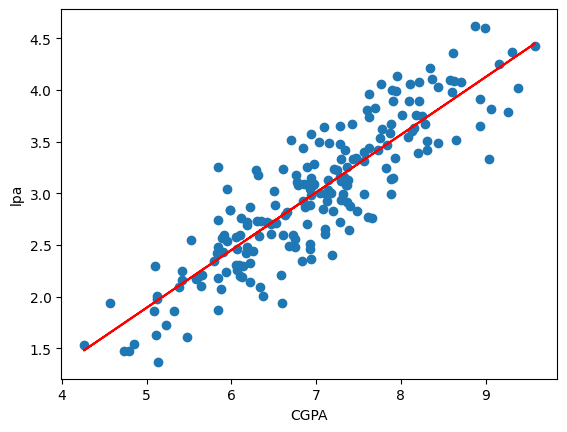

In [186]:
plt.scatter(X,y) # cgpa , lpa
plt.plot(X,lr.predict(X),color='red')
plt.xlabel('CGPA')
plt.ylabel('lpa')
plt.show()

In [187]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [188]:
y_pred = lr.predict(X_test)

In [189]:
y_test

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [190]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878174


In [191]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495523


In [192]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.3482705171773161


In [193]:
print("R2 score",r2_score(y_test,y_pred))
r2= r2_score(y_test,y_pred)
n =X.shape[0]

R2 score 0.7807301475103842


In [194]:
# print("adjusted r2 score",1-((1-r2)*(n-1)/(n-1-1)))
print("adjusted r2 score",1-((1-r2)*(40-1)/(40-1-1)))

adjusted r2 score 0.7749598882343417


In [195]:
new_df= df.copy()
new_df['random_col']= np.random.random(n)

new_df = new_df[['cgpa','random_col','package']]
new_df.head()


,cgpa,random_col,package
0,6.89,0.360888,3.26
1,5.12,0.535570,1.98
2,7.82,0.363335,3.25
3,7.42,0.142513,3.67
4,6.94,0.375174,3.57


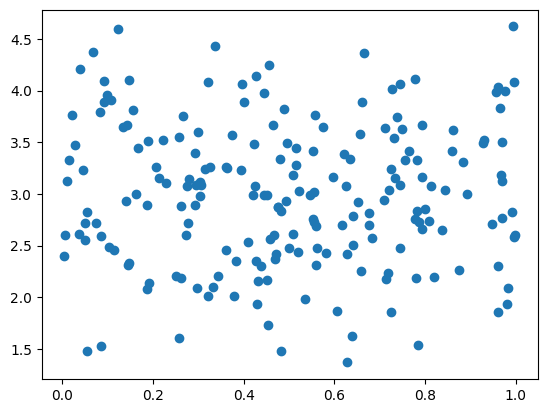

In [196]:
plt.scatter(new_df['random_col'],new_df['package'])

In [197]:
x = new_df.iloc[:,:-1]
Y = new_df.iloc[:,-1]

Y.head()

0    3.26
1    1.98
2    3.25
3    3.67
4    3.57
Name: package, dtype: float64

In [ ]:
x.head() 
        

,cgpa,random_col
0,6.89,0.360888
1,5.12,0.535570
2,7.82,0.363335
3,7.42,0.142513
4,6.94,0.375174


In [199]:
x_train,x_test,Y_train,Y_test  = train_test_split(x,Y,test_size=0.2,random_state=2)

In [200]:
from sklearn.linear_model import LinearRegression 
lir = LinearRegression()

In [201]:
lir.fit(x_train,Y_train)

LinearRegression()

In [202]:
Y_pred = lir.predict(x_test)
Y_pred

array([3.83952622, 3.15601824, 2.33419426, 2.51826638, 1.63706245,
       1.70411801, 2.13683411, 2.89874107, 3.69458186, 2.93149327,
       4.10521585, 3.58334572, 2.92179189, 2.47264541, 3.19390788,
       3.44653705, 1.97237592, 3.18949787, 2.96970083, 3.42464491,
       2.59122457, 3.10966893, 2.85197692, 3.05311094, 3.65840278,
       2.86163046, 3.51860187, 3.29209384, 3.85924611, 1.92875273,
       3.68901144, 3.23246609, 3.69478506, 2.85611064, 2.74111942,
       3.26807221, 3.54866625, 2.59468397, 2.63701351, 2.71269985])

In [203]:
print("r2 score",r2_score(Y_test,Y_pred))
r2s = r2_score(y_test,y_pred)

r2 score 0.7732886810144685


In [204]:
print("adjusted r2 score",1-((1-r2s)*(40-1)/(40-1-2)))

adjusted r2 score 0.768877723051486
